# **Comparative Analysis of AMD and Intel: Risk, Return, and Market Performance**

<H2> Introduction to AMD and Intel </H2>
<h3> Advanced Micro Devices (AMD):</h3> <br>
Advanced Micro Devices (AMD) is a leading semiconductor company specializing in high-performance computing, graphics, and visualization technologies. Founded in 1969, AMD is a key competitor in the CPU and GPU markets, challenging industry giant Intel and GPU leader NVIDIA. The company's Ryzen processors and Radeon graphics cards have gained significant market share, making it a critical player in both consumer and enterprise computing. AMD’s stock is known for its volatility, reflecting its competitive positioning and rapid innovation cycles. <br>
<br>
<H3> Intel Corporation (INTC): </H3> <br>
Intel Corporation, founded in 1968, is one of the world's largest semiconductor companies, primarily known for its dominance in the CPU market. Intel’s processors power a significant portion of personal computers, servers, and data centers globally. Despite facing increased competition from AMD and other semiconductor firms, Intel remains a key player in the industry, focusing on advancements in artificial intelligence, cloud computing, and chip manufacturing. Intel’s stock typically exhibits lower volatility than AMD, reflecting its more stable market presence and diversified product portfolio.

<h2> Why are we comparing with NASDAQ index? </h2>

We are comparing the NASDAQ index because both AMD and Intel are technology companies listed on the NASDAQ stock exchange, which primarily includes technology and growth-oriented companies

<h2> Are AMD and Intel Directly Comparable? </h2>

Yes, AMD (Advanced Micro Devices) and Intel are directly comparable because they operate in the same industry and compete in similar market segments. 

<h2> Why are we doing this analysis? </h2>

<B> Beta & Volatility:</B> Comparing AMD and Intel’s beta values helps investors understand their risk profiles relative to the market. <br>
<B> Risk-Adjusted Returns:</B> Using Sharpe Ratios, we determine which stock offers better compensation for risk. <br>

Let's start by, Importing required Modules 

In [8]:

import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf

%matplotlib inline
warnings.filterwarnings('ignore')
import json
import requests
import time

Listing the stocks and Index required for the analysis 

In [9]:
stocks = ['INTC.US', 'AMD.US','IXIC.INDX']
api_token = " 67c5c77e91eca9.07082353"

Duration of the analysis 1 year from March 2024 to March 2025

In [10]:
start_date = '2024-03-01'
end_date = '2025-03-01'

Crearing the Data Frame, pivoting the table for the filtering the columns. 

In [11]:
stocks_data_list = []

for stock_symbol in stocks:
    api_url = f"https://eodhd.com/api/eod/{stock_symbol}?api_token={api_token}&from={start_date}&to={end_date}&fmt=json"
    
    try:
        response = requests.get(api_url)
        
        if response.status_code == 200:
            try:
                stock_info = response.json()
                
                if isinstance(stock_info, list) and stock_info:
                    for record in stock_info:
                        record['Ticker'] = stock_symbol  # Rename 'Stock' to 'Ticker'
                    stocks_data_list.extend(stock_info)
                else:
                    print(f" No valid data received for {stock_symbol}. API response: {stock_info}")
            
            except json.JSONDecodeError as e:
                print(f"JSON Parsing Error for {stock_symbol}: {e}")
                print(f"Response Content: {response.text[:150]}...")  # Print first 150 chars of response
        
        else:
            print(f" API Request Failed for {stock_symbol}. HTTP Status: {response.status_code}")
            print(f"Response Content: {response.text[:150]}...")  # Print response snippet

    except requests.exceptions.RequestException as e:
        print(f"Network Error while fetching data for {stock_symbol}: {e}")
    
    time.sleep(0.5)  # Avoid hitting API rate limits


if not stocks_data_list:
    print("No stock data collected. Check API credentials and endpoint.")
else:
    stock_df = pd.DataFrame(stocks_data_list)
    
    
    print("\n Columns Available in DataFrame:", stock_df.columns.tolist())

   
    if 'date' in stock_df.columns:
        stock_df['date'] = pd.to_datetime(stock_df['date'])
    else:
        print(" date column missing in API response. Available columns:", stock_df.columns.tolist())
        exit()

    
    stock_df['StockSymbol'] = stock_df['Ticker'].str.split('.').str[0]

    
    final_df = stock_df.pivot_table(
        index='date',
        columns='StockSymbol',
        values='close',
        aggfunc='first'
    )
    final_df.columns.name = None  # Remove MultiIndex column name
    final_df = final_df.reset_index()

    final_df = final_df.sort_values('date')

    
    required_stocks = ['date', 'TSLA', 'AMD', 'IXIC']
    
    for symbol in required_stocks:
        if symbol not in final_df.columns and symbol != 'date':
            print(f"Warning: Data for {symbol} is missing in API response.")

    print("\n Final DataFrame Shape:", final_df.shape)
    print(" Columns:", final_df.columns.tolist())

    print("\n🔹 First 5 Rows:")
    print(final_df.head())

    print("\n🔹 Last 5 Rows:")
    print(final_df.tail())

   
    missing_data = final_df.isna().sum()
    if missing_data.sum() > 0:
        print("\n Missing Data Per Column:")
        print(missing_data)



 Columns Available in DataFrame: ['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'Ticker', 'warning']

 Final DataFrame Shape: (239, 4)
 Columns: ['date', 'AMD', 'INTC', 'IXIC']

🔹 First 5 Rows:
        date     AMD   INTC        IXIC
0 2024-03-18  190.65  42.71  16103.4502
1 2024-03-19  181.42  42.05  16166.7900
2 2024-03-20  179.73  42.20  16369.4102
3 2024-03-21  178.68  42.42  16401.8398
4 2024-03-22  179.65  42.57  16428.8203

🔹 Last 5 Rows:
          date     AMD   INTC        IXIC
234 2025-02-24  108.11  24.27  19286.9297
235 2025-02-25  103.96  22.99  19026.3906
236 2025-02-26  104.74  23.52  19075.2598
237 2025-02-27   99.51  23.09  18544.4199
238 2025-02-28   99.86  23.73  18847.2793


Copying the data frame to stocks data frame to maintain the original data frame. 

In [12]:
Stocks = final_df.copy()

Intial inspection of the data frame 

In [13]:
Stocks

,date,AMD,INTC,IXIC
0,2024-03-18,190.65,42.71,16103.4502
1,2024-03-19,181.42,42.05,16166.7900
2,2024-03-20,179.73,42.20,16369.4102
3,2024-03-21,178.68,42.42,16401.8398
4,2024-03-22,179.65,42.57,16428.8203
...,...,...,...,...
234,2025-02-24,108.11,24.27,19286.9297
235,2025-02-25,103.96,22.99,19026.3906
236,2025-02-26,104.74,23.52,19075.2598
237,2025-02-27,99.51,23.09,18544.4199


Making the date column as the index 

In [14]:
Stocks.set_index('date', inplace=True)

In [15]:
Stocks

,AMD,INTC,IXIC
date,,,
2024-03-18,190.65,42.71,16103.4502
2024-03-19,181.42,42.05,16166.7900
2024-03-20,179.73,42.20,16369.4102
2024-03-21,178.68,42.42,16401.8398
2024-03-22,179.65,42.57,16428.8203
...,...,...,...
2025-02-24,108.11,24.27,19286.9297
2025-02-25,103.96,22.99,19026.3906
2025-02-26,104.74,23.52,19075.2598


In [16]:
Stocks.describe()

,AMD,INTC,IXIC
count,239.000000,239.000000,239.000000
mean,147.254623,26.454895,17986.598010
std,20.030022,6.595584,1288.996124
min,99.510000,18.890000,15282.009800
25%,134.310000,20.790000,16870.825200
50%,150.770000,23.910000,17948.320300
75%,160.830000,30.945000,19167.965850
max,190.650000,44.520000,20173.890600


Renaming the column, for better readability

In [17]:
Stocks = Stocks.rename(columns= {"IXIC": "NASDAQ"})

In [18]:
Stocks

,AMD,INTC,NASDAQ
date,,,
2024-03-18,190.65,42.71,16103.4502
2024-03-19,181.42,42.05,16166.7900
2024-03-20,179.73,42.20,16369.4102
2024-03-21,178.68,42.42,16401.8398
2024-03-22,179.65,42.57,16428.8203
...,...,...,...
2025-02-24,108.11,24.27,19286.9297
2025-02-25,103.96,22.99,19026.3906
2025-02-26,104.74,23.52,19075.2598


In [19]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2024-03-18 to 2025-02-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMD     239 non-null    float64
 1   INTC    239 non-null    float64
 2   NASDAQ  239 non-null    float64
dtypes: float64(3)
memory usage: 7.5 KB


No null values 

Calculating the daily returns of assests 

In [20]:
Stocks.pct_change().describe()

,AMD,INTC,NASDAQ
count,238.000000,238.000000,238.000000
mean,-0.002310,-0.001821,0.000731
std,0.028243,0.035316,0.011841
min,-0.106165,-0.260585,-0.036391
25%,-0.016710,-0.018803,-0.004560
50%,-0.001634,-0.000871,0.001542
75%,0.013620,0.015033,0.008273
max,0.059454,0.160593,0.029519


<B> Most Volatile Stock: Intel <Br>
AMD, Intel means are in negative <br>
For risk takers and traders, Intel might be a good option since it has frequent price flucations 


<B> For Risk free Returns, I will be taking Government Backed 3 Months treasury Bills.    

In [21]:
from fredapi import Fred

In [22]:
fred = Fred(api_key='c3b68b765ec3b477b389e312668abf79')

In [23]:
fred.search('risk free').loc['DGS3MO'].loc['title']

'Market Yield on U.S. Treasury Securities at 3-Month Constant Maturity, Quoted on an Investment Basis'

In [24]:
risk_free = fred.get_series('DGS3MO')

since the treasure bills are annualized yields, we are dividing by 252 (trading days in a year) to get daily risk free returns 

In [25]:
rf = (risk_free/100)/252

filtering the data for matching the stocks' data 


In [26]:
rf = rf.loc['2024-03-01':'2025-03-01']

Intial inspection of risk free assests 

In [27]:
rf

2024-03-01    0.000215
2024-03-04    0.000217
2024-03-05    0.000217
2024-03-06    0.000217
2024-03-07    0.000217
                ...   
2025-02-24    0.000171
2025-02-25    0.000171
2025-02-26    0.000171
2025-02-27    0.000171
2025-02-28    0.000171
Length: 261, dtype: float64

<B> <h2> Correlation Matrix: 

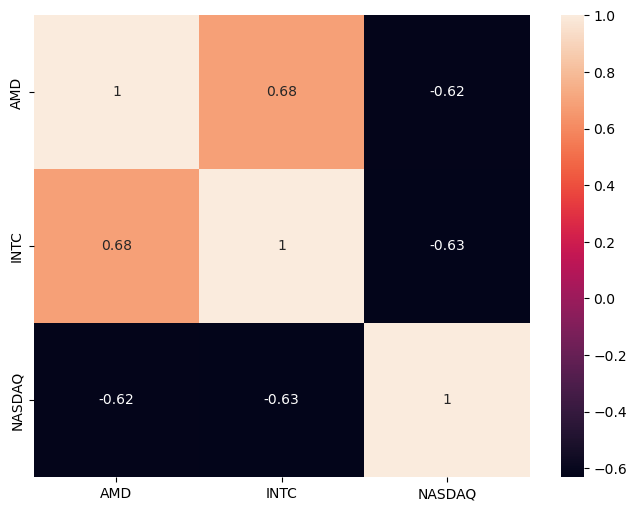

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(Stocks.corr(),annot=True)
plt.show()

<B> Intel, AMD has high correlation because both the stocks belongs to same sector (Chip Manufacturing) so, they are highly correlated. Even the during the Quaretly results and Management Commnetary and estimates, one stock can affect the other due to same expectations. Whereas, Nasdaq is negatively correlated with Intel and AMD.   

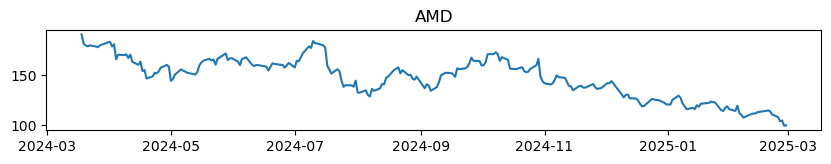

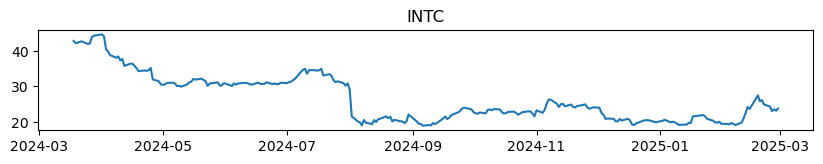

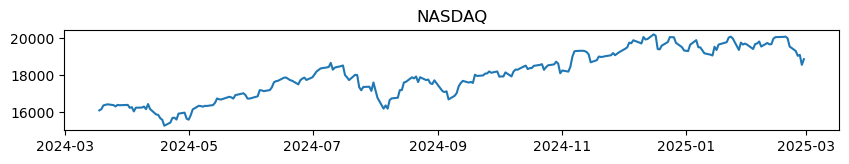

In [29]:
for i, stock in enumerate(Stocks.columns, start=1):
    plt.figure(figsize=(10,6))
    plt.subplot(4,1,i)
    plt.plot(Stocks[stock])
    plt.title(f'{stock}')
    plt.show()

<B> Both AMD, Intel are in Negative trends. On the other hand, NASDAQ in upward trend

<b> <h3> CAPM Analysis 

In [30]:
returns = Stocks.pct_change()

In [31]:
returns

,AMD,INTC,NASDAQ
date,,,
2024-03-18,NaN,NaN,NaN
2024-03-19,-0.048413,-0.015453,0.003933
2024-03-20,-0.009315,0.003567,0.012533
2024-03-21,-0.005842,0.005213,0.001981
2024-03-22,0.005429,0.003536,0.001645
...,...,...,...
2025-02-24,-0.024630,-0.024125,-0.012143
2025-02-25,-0.038387,-0.052740,-0.013509
2025-02-26,0.007503,0.023054,0.002568


Dropping the null values 

In [32]:
returns.dropna(inplace= True)

In [33]:
returns

,AMD,INTC,NASDAQ
date,,,
2024-03-19,-0.048413,-0.015453,0.003933
2024-03-20,-0.009315,0.003567,0.012533
2024-03-21,-0.005842,0.005213,0.001981
2024-03-22,0.005429,0.003536,0.001645
2024-03-25,-0.005678,-0.017383,-0.002699
...,...,...,...
2025-02-24,-0.024630,-0.024125,-0.012143
2025-02-25,-0.038387,-0.052740,-0.013509
2025-02-26,0.007503,0.023054,0.002568


In [34]:
rf = rf.to_frame()

The value is higher than 252 days. There would be yield reporting on non-trading days 

In [35]:
rf.shape

(261, 1)

In [36]:
rf.columns = ["Interest Rates"]

In [37]:
rf

,Interest Rates
2024-03-01,0.000215
2024-03-04,0.000217
2024-03-05,0.000217
2024-03-06,0.000217
2024-03-07,0.000217
...,...
2025-02-24,0.000171
2025-02-25,0.000171
2025-02-26,0.000171
2025-02-27,0.000171


Filtering the rows based on stocks' trsding days 

In [38]:
rf_filtered = rf[rf.index.isin(returns.index)]

In [39]:
rf_filtered

,Interest Rates
2024-03-19,0.000217
2024-03-20,0.000217
2024-03-21,0.000217
2024-03-22,0.000217
2024-03-25,0.000217
...,...
2025-02-24,0.000171
2025-02-25,0.000171
2025-02-26,0.000171
2025-02-27,0.000171


concating the both data frames 

In [40]:
returns = pd.concat([returns,rf_filtered],axis=1)

In [41]:
returns

,AMD,INTC,NASDAQ,Interest Rates
2024-03-19,-0.048413,-0.015453,0.003933,0.000217
2024-03-20,-0.009315,0.003567,0.012533,0.000217
2024-03-21,-0.005842,0.005213,0.001981,0.000217
2024-03-22,0.005429,0.003536,0.001645,0.000217
2024-03-25,-0.005678,-0.017383,-0.002699,0.000217
...,...,...,...,...
2025-02-24,-0.024630,-0.024125,-0.012143,0.000171
2025-02-25,-0.038387,-0.052740,-0.013509,0.000171
2025-02-26,0.007503,0.023054,0.002568,0.000171
2025-02-27,-0.049933,-0.018282,-0.027829,0.000171


Calculating the excess returns compared the risk free assest 

In [42]:
returns['Excess_NASDAQ'] = returns['NASDAQ'] - returns['Interest Rates']
returns['Excess_AMD'] = returns['AMD'] - returns['Interest Rates']
returns['Excess_INTC'] = returns['INTC'] - returns['Interest Rates']

In [43]:
returns.dropna(inplace=True)

In [44]:
returns

,AMD,INTC,NASDAQ,Interest Rates,Excess_NASDAQ,Excess_AMD,Excess_INTC
2024-03-19,-0.048413,-0.015453,0.003933,0.000217,0.003716,-0.048631,-0.015671
2024-03-20,-0.009315,0.003567,0.012533,0.000217,0.012316,-0.009532,0.003350
2024-03-21,-0.005842,0.005213,0.001981,0.000217,0.001764,-0.006060,0.004996
2024-03-22,0.005429,0.003536,0.001645,0.000217,0.001428,0.005212,0.003319
2024-03-25,-0.005678,-0.017383,-0.002699,0.000217,-0.002916,-0.005894,-0.017600
...,...,...,...,...,...,...,...
2025-02-24,-0.024630,-0.024125,-0.012143,0.000171,-0.012314,-0.024801,-0.024296
2025-02-25,-0.038387,-0.052740,-0.013509,0.000171,-0.013679,-0.038557,-0.052911
2025-02-26,0.007503,0.023054,0.002568,0.000171,0.002397,0.007332,0.022882
2025-02-27,-0.049933,-0.018282,-0.027829,0.000171,-0.028000,-0.050105,-0.018454


In [45]:
import statsmodels.api as sm

Defining the Independent variable as Nasdaq. As we are taking it as a Market Benchmark 

In [46]:
X = returns[['Excess_NASDAQ']]
X = sm.add_constant(X) #independent variable

Below Function will calcualte Beta and alpha which are the useful to perform CAPM Analysis 

In [47]:
def calculate_beta(y):
    model = sm.OLS(y, X).fit()
    return model.summary(), model.params

In [48]:
AMD_summmary,beta_amd = calculate_beta(returns['Excess_AMD'])
INTC_summary,beta_intc = calculate_beta(returns['Excess_INTC'])

In [49]:
print(AMD_summmary)

                            OLS Regression Results                            
Dep. Variable:             Excess_AMD   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     167.8
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           2.74e-29
Time:                        20:44:11   Log-Likelihood:                 570.32
No. Observations:                 236   AIC:                            -1137.
Df Residuals:                     234   BIC:                            -1130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0032      0.001     -2.276

NASDAQ’s excess return is a strong and statistically significant predictor of AMD’s excess return. <br>
AMD is highly sensitive to NASDAQ movements (β > 1), indicating it is more volatile than the broader market. <br>
Negative intercept suggests AMD underperforms slightly when NASDAQ has zero excess returns. <br>

In [50]:
print(INTC_summary)

                            OLS Regression Results                            
Dep. Variable:            Excess_INTC   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     71.80
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           2.68e-15
Time:                        20:44:11   Log-Likelihood:                 485.96
No. Observations:                 236   AIC:                            -967.9
Df Residuals:                     234   BIC:                            -961.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0025      0.002     -1.262

NASDAQ’s excess return is a statistically significant predictor of Intel’s excess return. <br>
Intel has a beta of 1.44, suggesting it is more volatile than the NASDAQ index.
The intercept is not significant, meaning Intel’s standalone performance isn’t meaningfully different from zero. <br>
Residuals indicate potential issues with normality, which might affect inference accuracy. <br>

<b> <H2> Comparsion: </H2> 
AMD’s excess returns are better explained by NASDAQ than Intel’s (higher R²). <br>
AMD is slightly more sensitive to NASDAQ movements than Intel (higher beta). <br>
Both models have non-normal residuals, which may impact inference. <br>
Intel’s intercept is not significant, meaning its baseline performance is uncertain. <br>

In [51]:
print(beta_amd)


const           -0.003215
Excess_NASDAQ    1.542028
dtype: float64


In [52]:
print(beta_intc)

const           -0.002548
Excess_NASDAQ    1.442307
dtype: float64


In [53]:
beta_amd = beta_amd[1]
beta_intc = beta_intc[1]

In [54]:
print("Beta Of AMD",beta_amd)
print("Beta of Intel", beta_intc)

Beta Of AMD 1.5420275125896523
Beta of Intel 1.4423066453217572


Calculating the Expected returns 

In [55]:
expected_return_amd = returns['Interest Rates'] + beta_amd * returns['Excess_NASDAQ']
expected_return_intc = returns['Interest Rates'] + beta_intc * returns['Excess_NASDAQ']

In [56]:
returns['Expected_AMD'] = expected_return_amd
returns['Expected_INTC'] = expected_return_intc

In [57]:
print(returns[['Expected_AMD', 'Expected_INTC']].head())

            Expected_AMD  Expected_INTC
2024-03-19      0.005947       0.005577
2024-03-20      0.019209       0.017981
2024-03-21      0.002937       0.002761
2024-03-22      0.002419       0.002277
2024-03-25     -0.004280      -0.003989


In [58]:
returns

,AMD,INTC,NASDAQ,Interest Rates,Excess_NASDAQ,Excess_AMD,Excess_INTC,Expected_AMD,Expected_INTC
2024-03-19,-0.048413,-0.015453,0.003933,0.000217,0.003716,-0.048631,-0.015671,0.005947,0.005577
2024-03-20,-0.009315,0.003567,0.012533,0.000217,0.012316,-0.009532,0.003350,0.019209,0.017981
2024-03-21,-0.005842,0.005213,0.001981,0.000217,0.001764,-0.006060,0.004996,0.002937,0.002761
2024-03-22,0.005429,0.003536,0.001645,0.000217,0.001428,0.005212,0.003319,0.002419,0.002277
2024-03-25,-0.005678,-0.017383,-0.002699,0.000217,-0.002916,-0.005894,-0.017600,-0.004280,-0.003989
...,...,...,...,...,...,...,...,...,...
2025-02-24,-0.024630,-0.024125,-0.012143,0.000171,-0.012314,-0.024801,-0.024296,-0.018818,-0.017590
2025-02-25,-0.038387,-0.052740,-0.013509,0.000171,-0.013679,-0.038557,-0.052911,-0.020923,-0.019559
2025-02-26,0.007503,0.023054,0.002568,0.000171,0.002397,0.007332,0.022882,0.003868,0.003629
2025-02-27,-0.049933,-0.018282,-0.027829,0.000171,-0.028000,-0.050105,-0.018454,-0.043006,-0.040213


Calculating the Sharpe Ratios 

In [59]:
sharpe_amd = returns['Excess_AMD'].mean() / returns['Excess_AMD'].std()
sharpe_intc = returns['Excess_INTC'].mean() / returns['Excess_INTC'].std()

In [60]:
print(sharpe_amd)
print(sharpe_intc)

-0.08619346440964265
-0.05164504803550624


<h3> Key Insights: </h3>
Negative Sharpe Ratios <br>

Both AMD and Intel have negative Sharpe Ratios, meaning their risk-free adjusted returns were negative, indicating underperformance relative to risk. <br>
Investors were not adequately compensated for the volatility in these stocks.<br>
AMD vs. INTC <br>

AMD’s Sharpe Ratio (-0.0864) is lower than Intel’s (-0.0514), suggesting AMD had a worse risk-adjusted return. <br>
Even though AMD has a higher beta (1.54 vs. 1.44) and reacts more strongly to market movements, it did not translate into better risk-adjusted performance. <br>
Implications <br>

A negative Sharpe Ratio typically discourages investment, as it implies the asset underperformed relative to risk-free alternatives.
Intel performed slightly better than AMD in risk-adjusted terms, but both performed poorly overall. <br>

<b> <h2> Final Verdict </H2> <br>
Both of the stocks are not worth to investment while market indexes are giving higher returns. To find the winner between both, Intel has better risk to return ratio. 